In [60]:

import json
from collections import defaultdict
from textblob import TextBlob
stores = ["macys","neimanmarcus","gap","dillards","jcpenney","kohls","nordstrom","target","tjmaxx", "bluemercury","sephora","ulta","kiehls","aesop","lush","origins"]

print(TextBlob("Hi!").sentiment)

for i, name in enumerate(stores):
    file_name = name+"_reviews.txt"
    with open(file_name) as f:
        reviews = json.load(f)
    data = []
    sentiment = []
    for d in reviews:
        #print(d['text'])
        text = TextBlob(d['text'])
        sentiment.append(float(text.sentiment[0]))
    #print(sentiment)
    file_name = name+"_sentiment.txt"
    with open(file_name, 'w') as outfile:
        for s in sentiment:
            string = str(s) + "\n"
            outfile.write(string)
   # result = ml.classifiers.classify(model_id, data)
   # print(result.body)

Sentiment(polarity=0.0, subjectivity=0.0)


macys median sentiment:  0.12300803218116156
neimanmarcus median sentiment:  0.1819311423245435
gap median sentiment:  0.1280035628061149
dillards median sentiment:  0.14866707090373227
jcpenney median sentiment:  0.1420453485325615
kohls median sentiment:  0.13272187043055675
nordstrom median sentiment:  0.2151267443597684
target median sentiment:  0.14634202350160183
tjmaxx median sentiment:  0.18468558442087255
bluemercury median sentiment:  0.18694770594090487
sephora median sentiment:  0.18165096378075873
ulta median sentiment:  0.17506102637402163
kiehls median sentiment:  0.1998764914004881
aesop median sentiment:  0.2931879963974265
lush median sentiment:  0.2399062483083579
origins median sentiment:  0.28123462225972445


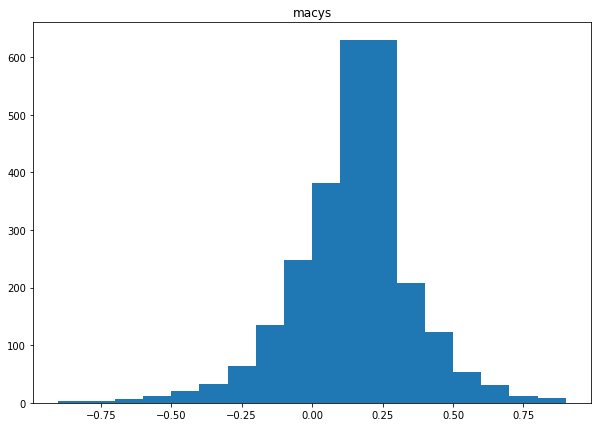

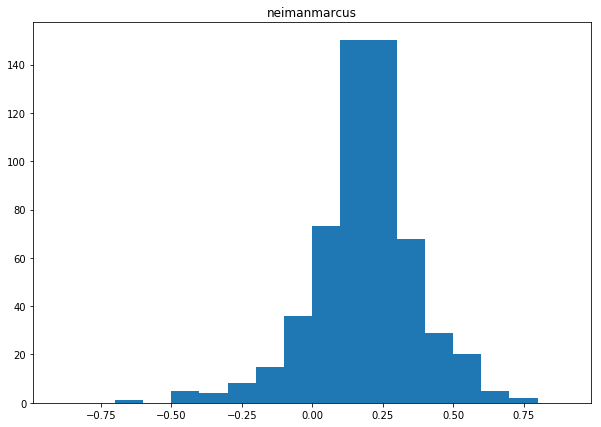

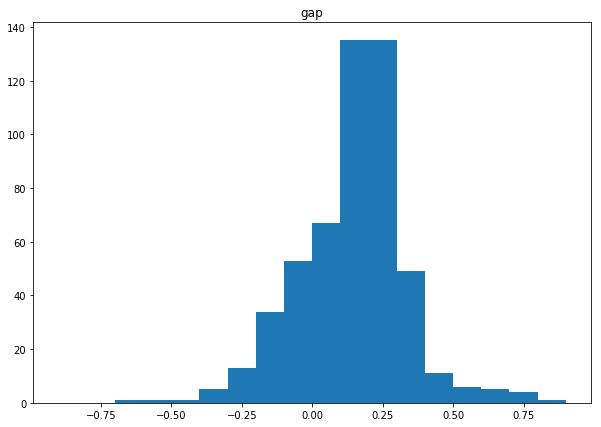

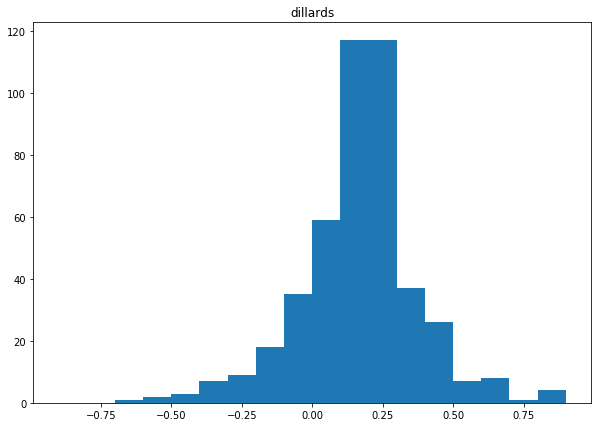

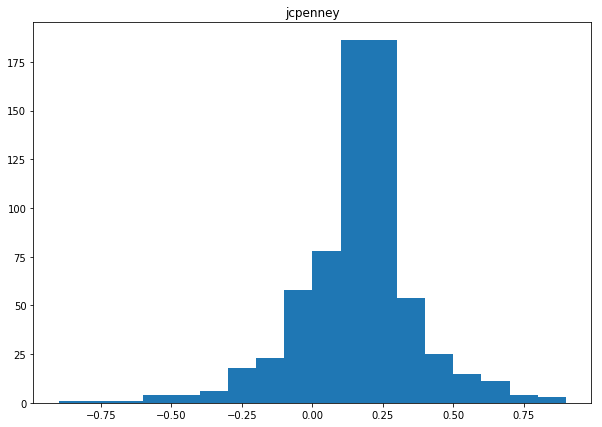

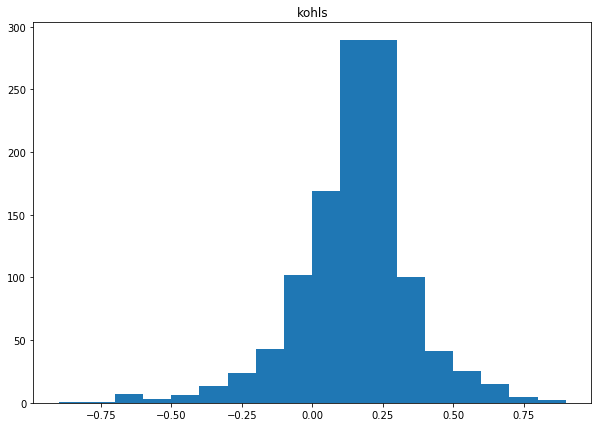

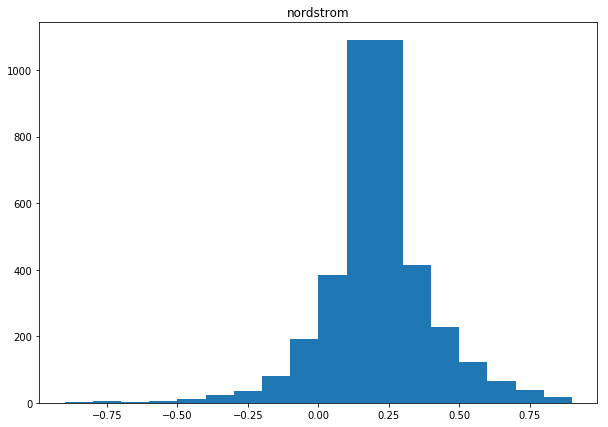

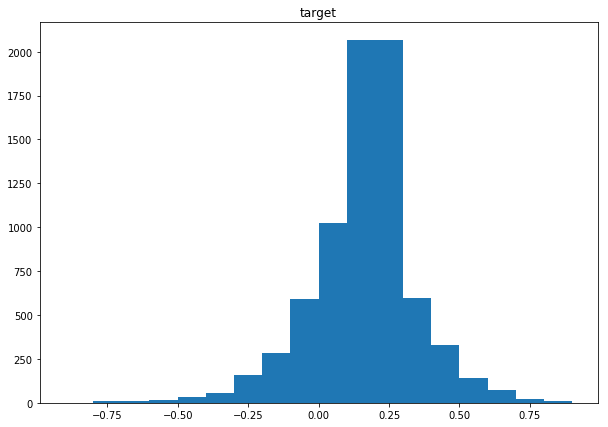

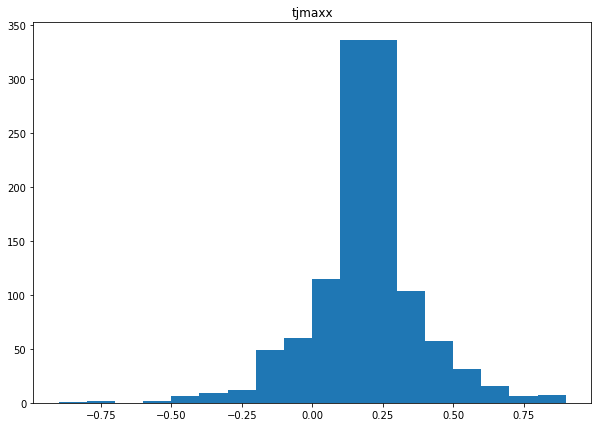

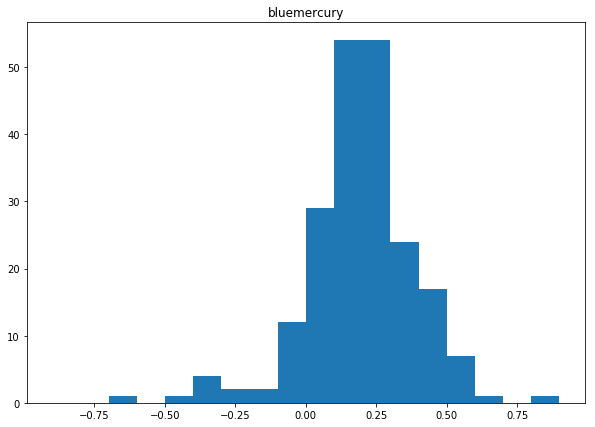

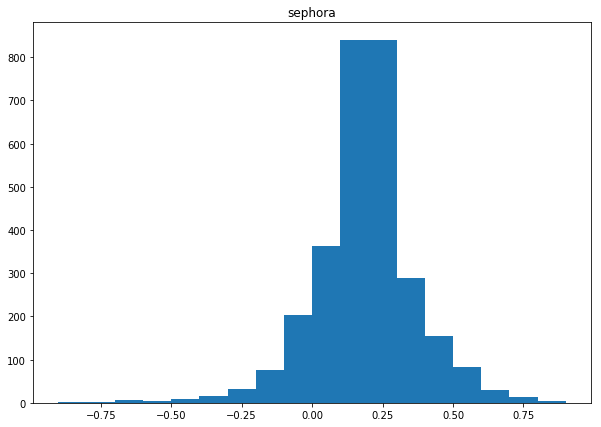

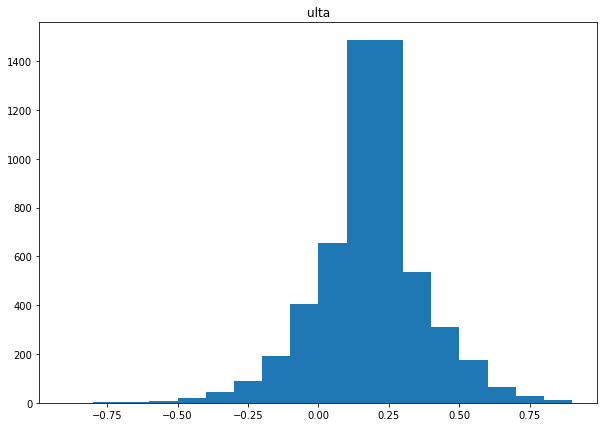

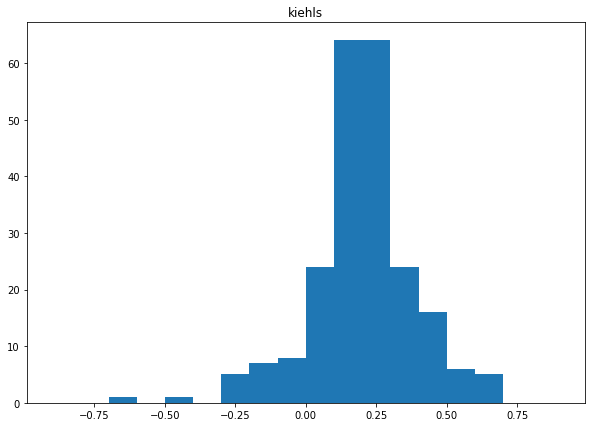

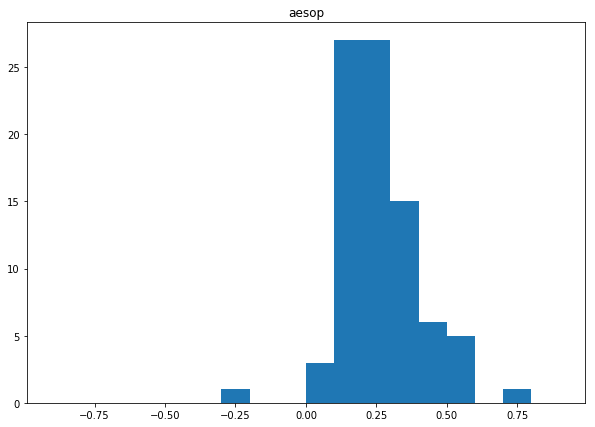

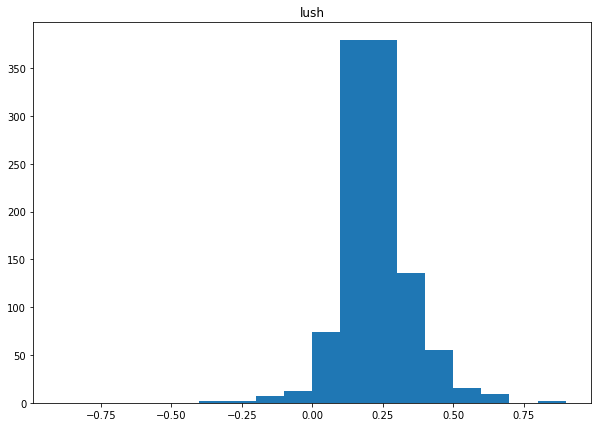

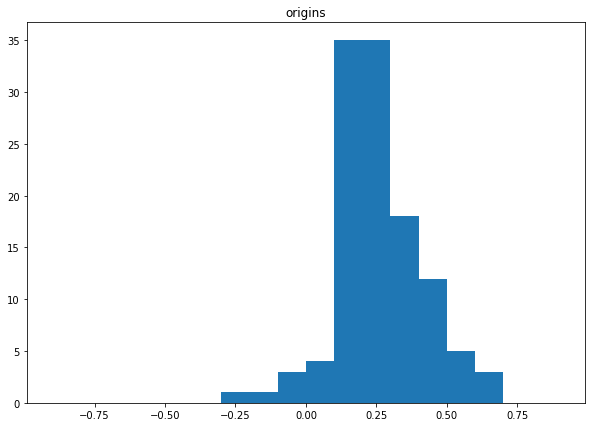

In [61]:
from matplotlib import pyplot as plt
import numpy as np
 
stores = ["macys","neimanmarcus","gap","dillards","jcpenney","kohls","nordstrom","target","tjmaxx", "bluemercury","sephora","ulta","kiehls","aesop","lush","origins"]
for i, name in enumerate(stores):
    file_name = name+"_sentiment.txt"
    sentiments = []
    with open(file_name) as f:
        for line in f:
            sentiments.append(float(line))
# Creating dataset
    a = np.array(sentiments)
    print(stores[i] + " median sentiment: ", np.average(a))
    
for i, name in enumerate(stores):
    file_name = name+"_sentiment.txt"
    sentiments = []
    with open(file_name) as f:
        for line in f:
            sentiments.append(float(line))
# Creating dataset
    a = np.array(sentiments)
    # Creating histogram
    fig, ax = plt.subplots(figsize =(10, 7))
    ax.hist(a, bins = [-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0, 0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
    plt.title(stores[i])
    plt.show()
    


In [56]:
import json
from collections import defaultdict
from textblob import TextBlob
stores = ["macys","neimanmarcus","gap","dillards","jcpenney","kohls","nordstrom","target","tjmaxx", "bluemercury","sephora","ulta","kiehls","aesop","lush","origins"]

print(TextBlob("Hi!").sentiment)

for i, name in enumerate(stores):
    file_name = name+"_reviews.txt"
    with open(file_name) as f:
        reviews = json.load(f)
    data = []
    sentiment = []
    time = []
    for d in reviews:
        #print(d['text'])
        text = TextBlob(d['text'])
        sentiment.append(text.sentiment[0])
        time.append(d['date'])
    #print(sentiment)
    file_name = name+"_sentiment_time_adjusted.txt"
    with open(file_name, 'w') as outfile:
        for j,s in enumerate(sentiment):
            string = str(s) + " " + time[j] + "\n"
            outfile.write(string)
   # result = ml.classifiers.classify(model_id, data)
   # print(result.body)

Sentiment(polarity=0.0, subjectivity=0.0)


macys average sentiment:  0.10726228813638995


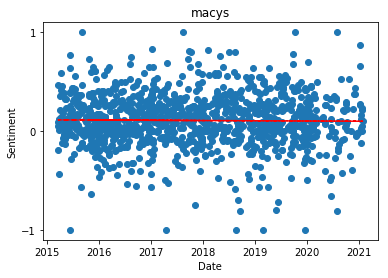

neimanmarcus average sentiment:  0.16273164622743827


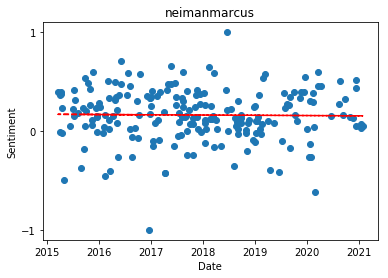

gap average sentiment:  0.10883913811456769


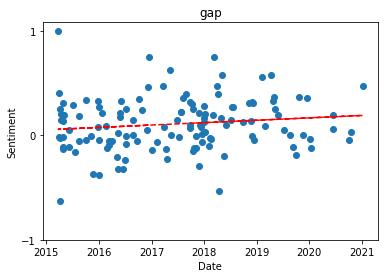

dillards average sentiment:  0.141604604393742


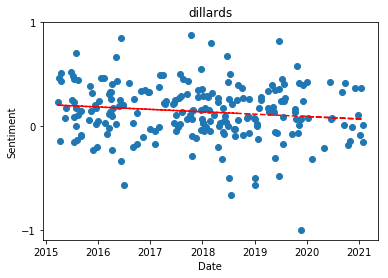

jcpenney average sentiment:  0.12613108391535888


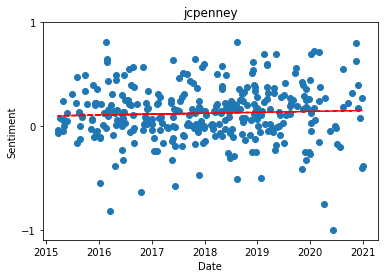

kohls average sentiment:  0.10217173540555256


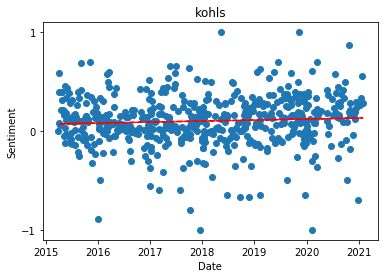

nordstrom average sentiment:  0.19431681331559994


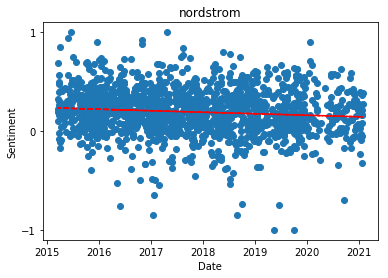

target average sentiment:  0.13178349817829235


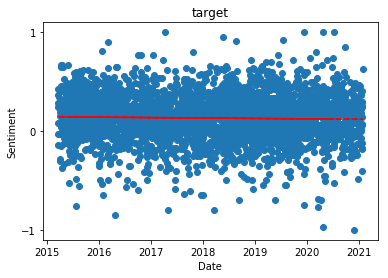

tjmaxx average sentiment:  0.15333267399401476


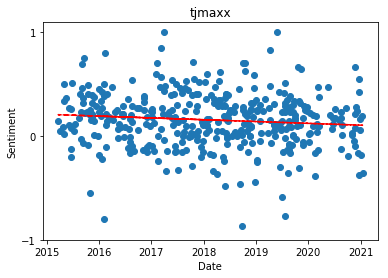

bluemercury average sentiment:  0.18409979507743357


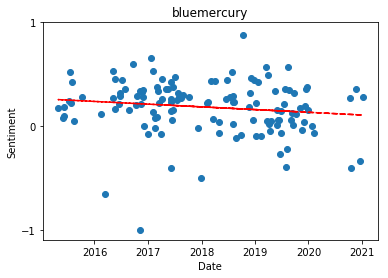

sephora average sentiment:  0.1740039810245052


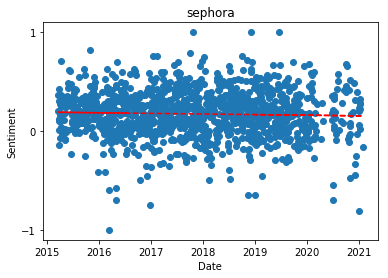

ulta average sentiment:  0.17063562930692794


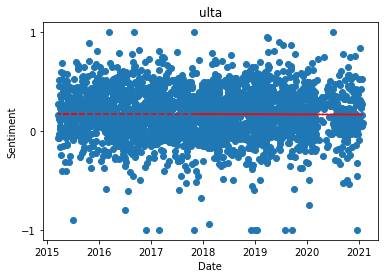

kiehls average sentiment:  0.13100285615320853


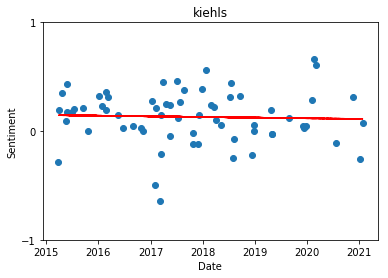

aesop average sentiment:  0.34563388348573654


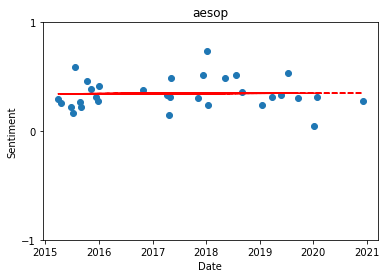

lush average sentiment:  0.2761373227849648


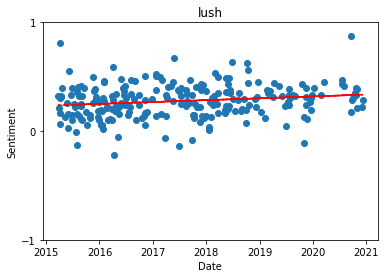

In [57]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from dateutil import parser 

stores = ["macys","neimanmarcus","gap","dillards","jcpenney","kohls","nordstrom","target","tjmaxx", "bluemercury","sephora","ulta","kiehls","aesop","lush","origins"]
after_date = parser.parse("2015-03-20")
for i, name in enumerate(stores):
    file_name = name+"_sentiment_time_adjusted.txt"
    sentiments = []
    times = []
    with open(file_name) as f:
        for line in f:
            if line != "":
                time = parser.parse(line.split()[1])
                if time > after_date:
                    sentiments.append(float(line.split()[0]))
                    times.append(time)
    print(stores[i] + " average sentiment: ", np.average(sentiments))
    dates = matplotlib.dates.date2num(times)
    plt.plot_date(dates,sentiments)
    z = np.polyfit(dates, sentiments, 1)
    p = np.poly1d(z)
    plt.plot(dates,p(dates),"r--")
    plt.title(stores[i])
    plt.yticks([-1.0,0.0,1.0])
    plt.xlabel("Date")
    plt.ylabel("Sentiment")
    plt.show()